In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [2]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jaskirat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jaskirat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Jaskirat\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
# !wget -nc https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification

# !wget -nc https://lazyprogrammmer.me/course_files/nlp/bbc_text_cls.csv

In [4]:
import os

dir_path = []
for dirname, _, filenames in os.walk('./bbc-fulltext/bbc'):
    dir_path.append(dirname)

dir_path

['./bbc-fulltext/bbc',
 './bbc-fulltext/bbc\\business',
 './bbc-fulltext/bbc\\entertainment',
 './bbc-fulltext/bbc\\politics',
 './bbc-fulltext/bbc\\sport',
 './bbc-fulltext/bbc\\tech']

In [5]:
import glob
import io
import warnings
warnings.filterwarnings("ignore")

def text_to_pandasDF(path):
    df = pd.DataFrame(columns=['news', 'class'])
    txt = []
    label = []
    
    for dirpath in path:
        text_files_path = sorted(glob.glob(os.path.join(dirpath, '*.txt')))
        
        for text_path in text_files_path:
            with io.open(text_path, 'r', encoding='utf-8', errors='ignore') as txt_file:
                txt.append(txt_file.read())
                label.append(dirpath.split('/')[-1])

    df['news'] = txt
    df['class'] = label
    txt, label = [], []
    
    return df

In [6]:
df = text_to_pandasDF(dir_path[1:])
df.head()

,news,class
0,Ad sales boost Time Warner profit\n\nQuarterly...,bbc\business
1,Dollar gains on Greenspan speech\n\nThe dollar...,bbc\business
2,Yukos unit buyer faces loan claim\n\nThe owner...,bbc\business
3,High fuel prices hit BA's profits\n\nBritish A...,bbc\business
4,Pernod takeover talk lifts Domecq\n\nShares in...,bbc\business


In [7]:
inputs = df['news']
labels = df['class']

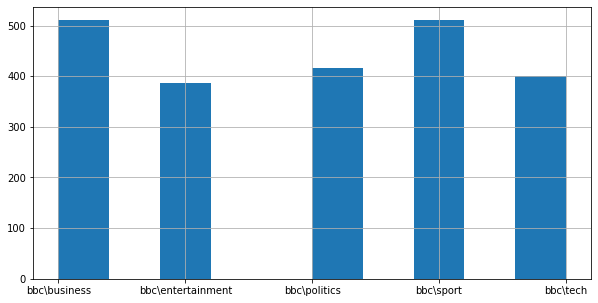

In [8]:
labels.hist(figsize=(10,5));

In [9]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state=42)

In [10]:
vectorizer = CountVectorizer()

In [11]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

In [12]:
Xtrain

<1668x26157 sparse matrix of type '<class 'numpy.int64'>'
	with 337538 stored elements in Compressed Sparse Row format>

In [13]:
(Xtrain!=0).sum()

337538

In [14]:
# what percentage of values are non-zero?
(Xtrain!=0).sum() / np.prod(Xtrain.shape)

0.00773639604201488

In [15]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score: ', model.score(Xtrain, Ytrain))
print('test score: ', model.score(Xtest, Ytest))

train score:  0.9952038369304557
test score:  0.9712746858168761


In [16]:
# with stopwords
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score: ', model.score(Xtrain, Ytrain))
print('test score: ', model.score(Xtest, Ytest))

train score:  0.9964028776978417
test score:  0.9712746858168761


In [17]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [18]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
               for word, tag in words_and_tags]

In [19]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Jaskirat\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
# with lemmatization
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score: ', model.score(Xtrain, Ytrain))
print('test score: ', model.score(Xtest, Ytest))

train score:  0.9928057553956835
test score:  0.9694793536804309


In [21]:
class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(t) for t in tokens]

In [22]:
# with stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score: ', model.score(Xtrain, Ytrain))
print('test score: ', model.score(Xtest, Ytest))

train score:  0.9922062350119905
test score:  0.9712746858168761


In [23]:
def simple_tokenizer(s):
    return s.split()

In [24]:
# string split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print('train score: ', model.score(Xtrain, Ytrain))
print('test score: ', model.score(Xtest, Ytest))

train score:  0.9988009592326139
test score:  0.9587073608617595
